In [162]:
##
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from scipy.stats import randint
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
pio.templates.default = "none"

import warnings
warnings.filterwarnings('ignore')
import pickle
from xgboost import XGBClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay


In [163]:
import warnings 
warnings.filterwarnings(action= 'ignore')

In [164]:
#conda install pandas

In [165]:
pd.__version__

'2.1.0'

In [166]:
#we are reading our data
df = pd.read_csv('heart.csv')

In [167]:
# First 5 rows of our data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [168]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [169]:
#check for total no of data
df.shape

(303, 14)

In [170]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Data contains;

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
5. chol - serum cholestoral in mg/dl
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg - resting electrocardiographic results
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest
11. slope - the slope of the peak exercise ST segment
12. ca - number of major vessels (0-3) colored by flourosopy
13. thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
14. target - have disease or not (1=yes, 0=no)

## Data Exploration

In [171]:
df.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

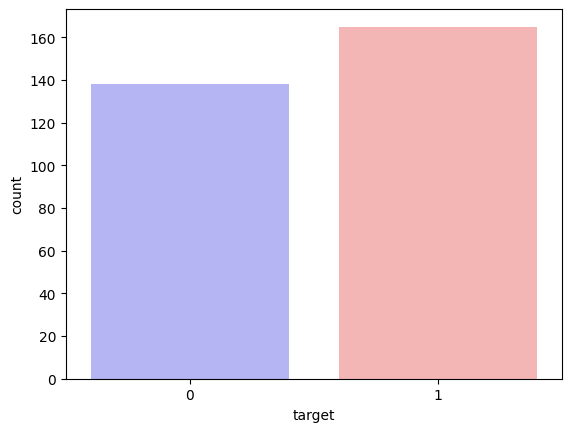

In [172]:
#visualize target variable
sns.countplot(x="target", data=df, palette="bwr")
plt.show()

In [173]:
#check for percentages of pateints and non_patients
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


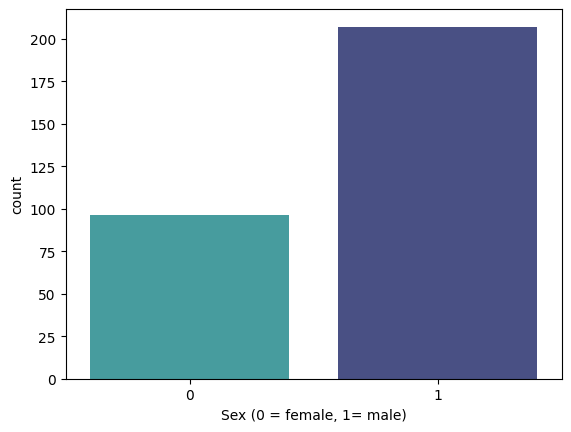

In [174]:
#visualize gender of our data
sns.countplot(x='sex', data=df, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [175]:
#check for gender percentages 
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.sex))*100)))

Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


In [176]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


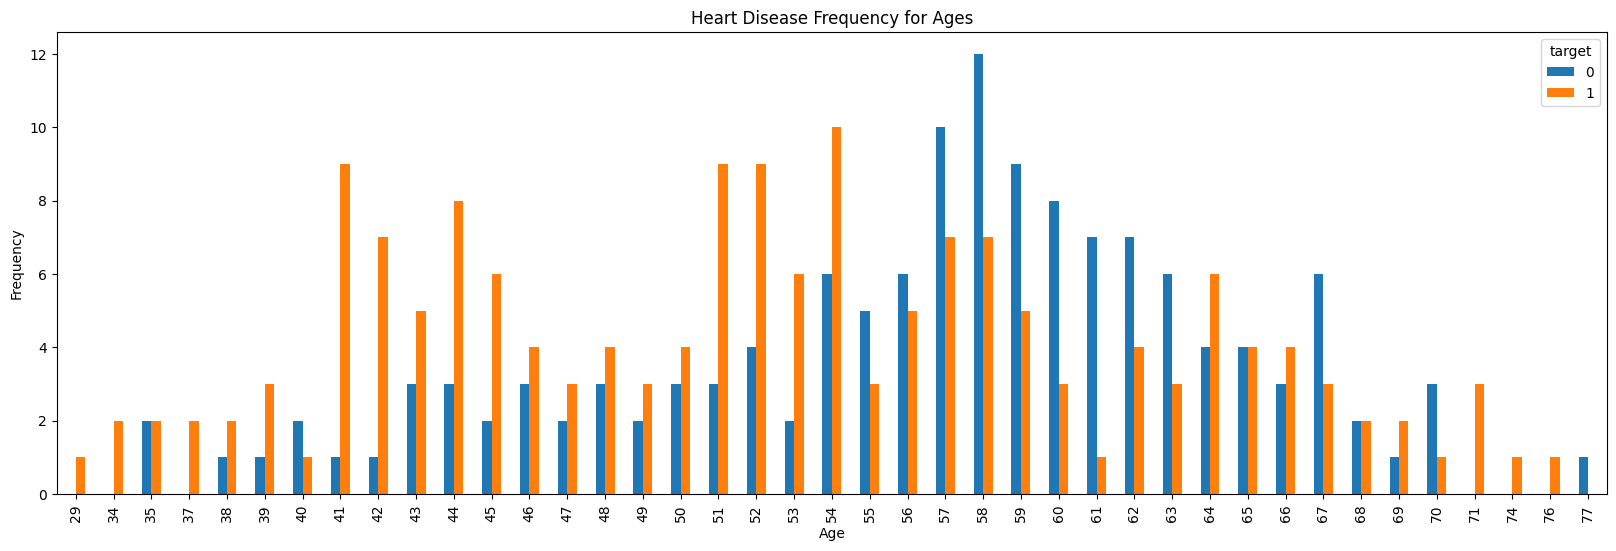

In [177]:
#visualize if sick or not for each age
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

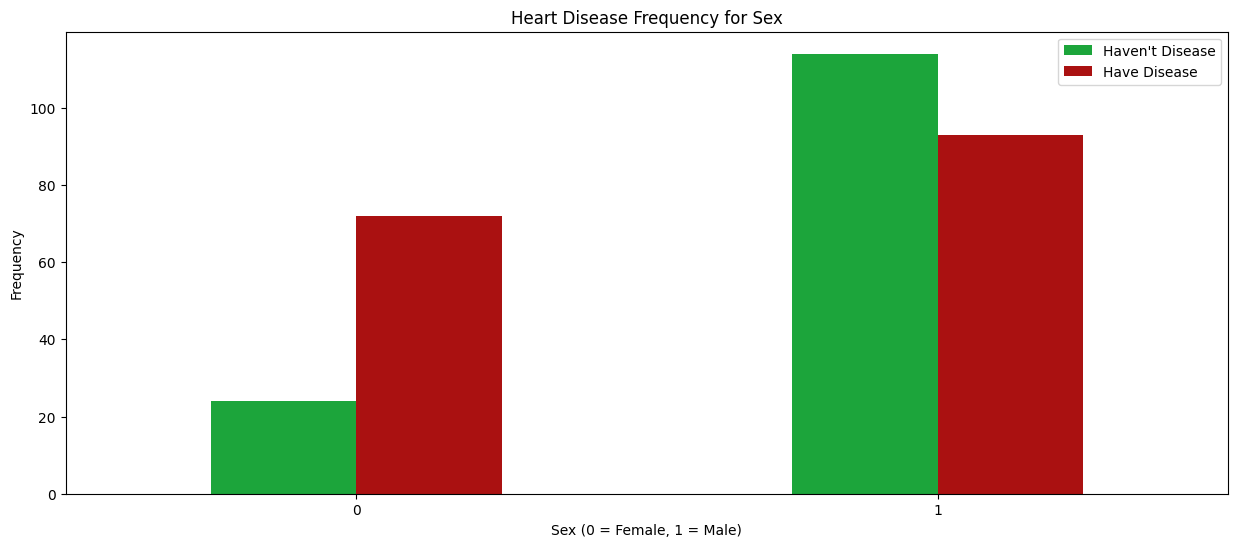

In [178]:
# visualize if sick or not for each gender
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

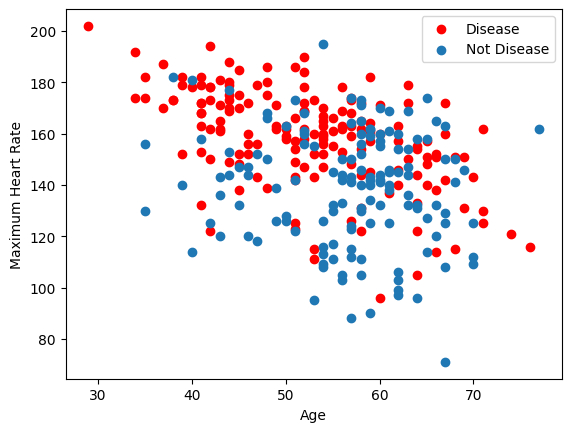

In [179]:
#scatter plot for age against age
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

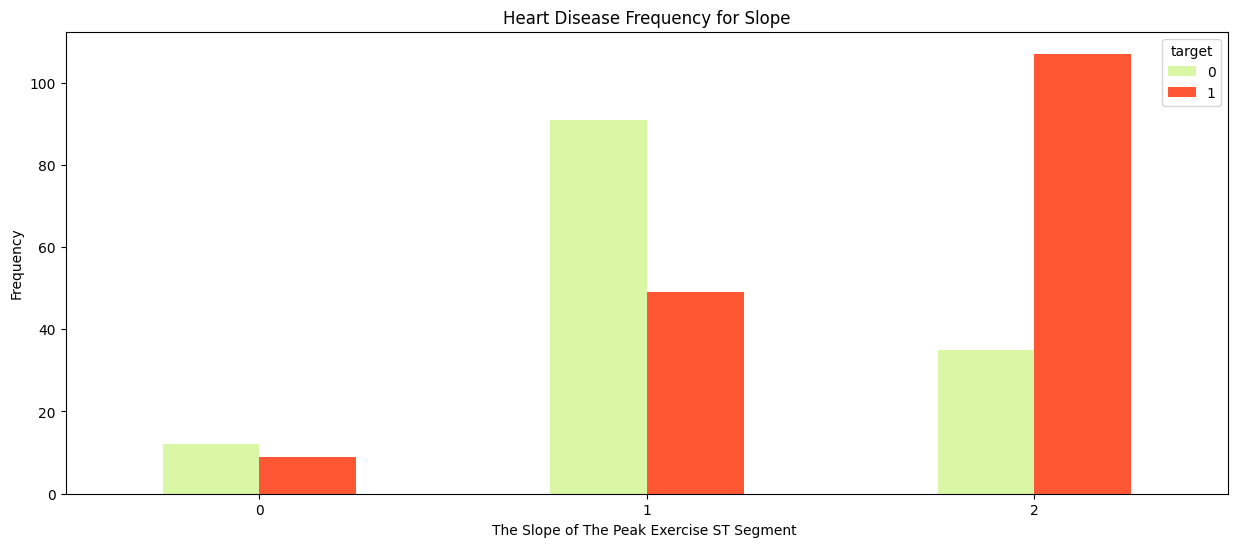

In [180]:
pd.crosstab(df.slope,df.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

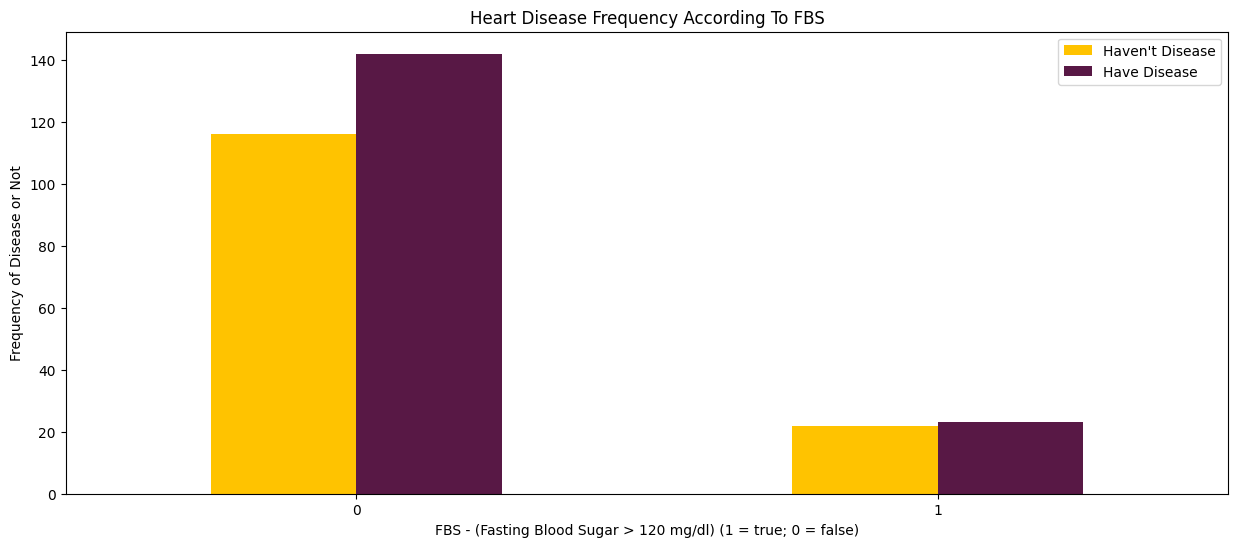

In [181]:
#visualize heart disease according to fasting blood sugar
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

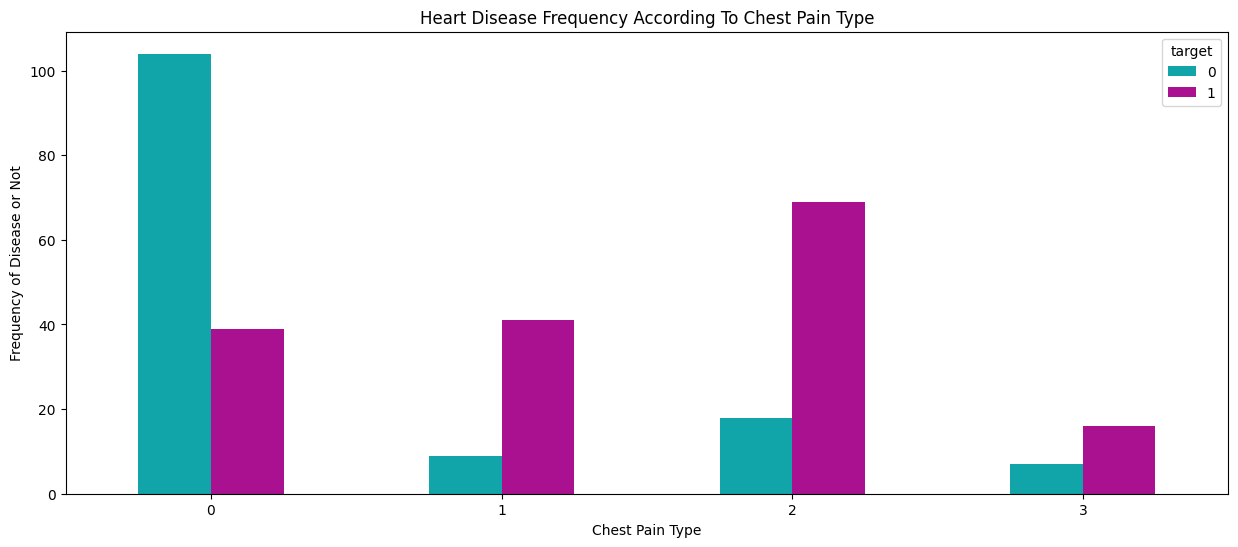

In [182]:
#visualize heart disease according to chest pain
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [184]:
# df['thal'] = df['thal'].astype('category')
# df['cp'] = df['cp'].astype('category')
# df['slope'] = df['slope'].astype('category')

#### Data correlation.

In [185]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


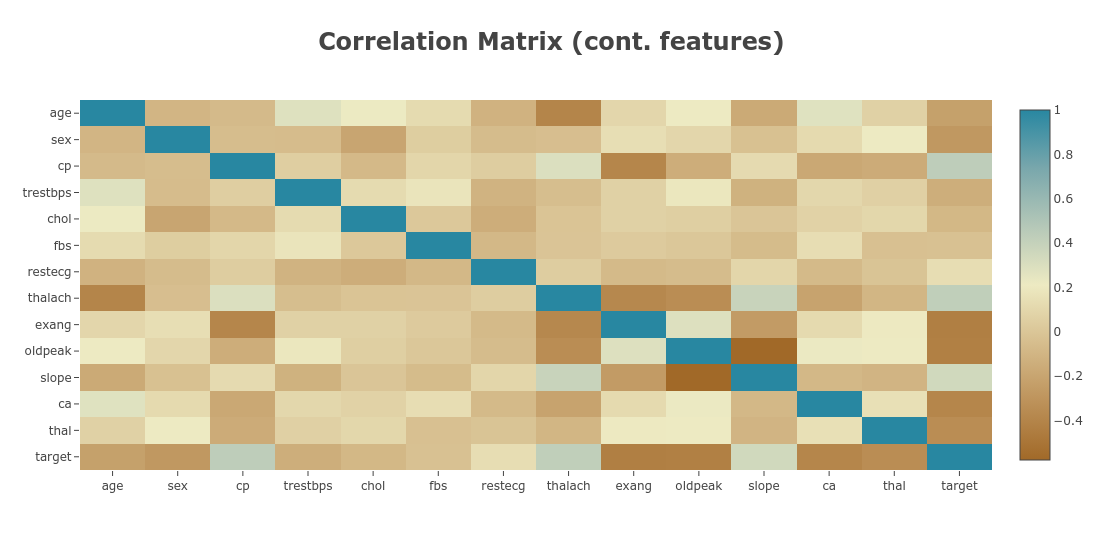

In [186]:
import plotly.graph_objects as go

corr = df.corr()
fig = go.Figure(data=go.Heatmap(
    z=corr.values,  # Extract the values from the correlation DataFrame
    x=corr.index.values,
    y=corr.columns.values,
    colorscale='earth',
))

fig.update_layout(
    title_text='<b>Correlation Matrix (cont. features)<b>',
    title_x=0.5,
    titlefont={'size': 24},
    width=550,
    height=550,
    xaxis_showgrid=False,
    yaxis_showgrid=False,
    yaxis_autorange='reversed',
    paper_bgcolor=None,
)

fig.show()

In [187]:
df.shape

(303, 14)

## separate our target and features data 

In [188]:
y = df.target.values
x_data = df.drop(['target'], axis = 1)

In [189]:
# define data_dmatrix
data_dmatrix = xgb.DMatrix(data=x_data,label=y)

## We will split our data. 80% of our data will be train data and 20% of it will be test data.

In [190]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y, test_size = 0.2,random_state=0, stratify=y)

In [191]:
# Scaling the data

from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

x_train = scalar.fit_transform(x_train)
x_test = scalar.fit_transform(x_test)

### Logistic Regression

In [192]:
#initilaize logistic regression model.
log_reg_clf = LogisticRegression(C=1e40, solver='newton-cg')

In [193]:
# fit the model with training data
log_reg_clf.fit(x_train, y_train)

LogisticRegression(C=1e+40, solver='newton-cg')

In [194]:
y_pred=log_reg_clf.predict(x_test) # prediction on test set

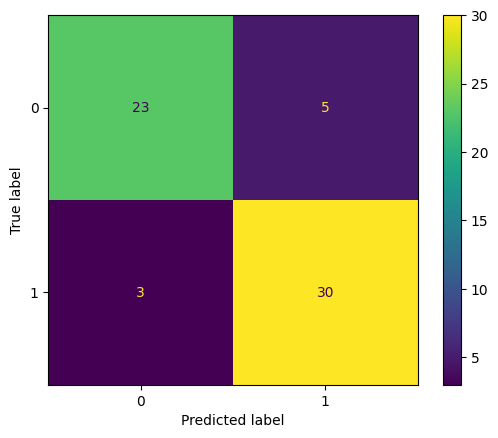

In [195]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [196]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85        28
           1       0.86      0.91      0.88        33

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [197]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8688524590163934
Precision: 0.8571428571428571
Recall: 0.9090909090909091


### Xgboost Classifier

In [198]:
xgb_cl= XGBClassifier()
xgb_cl.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [199]:
y_pred2 = xgb_cl.predict(x_test)

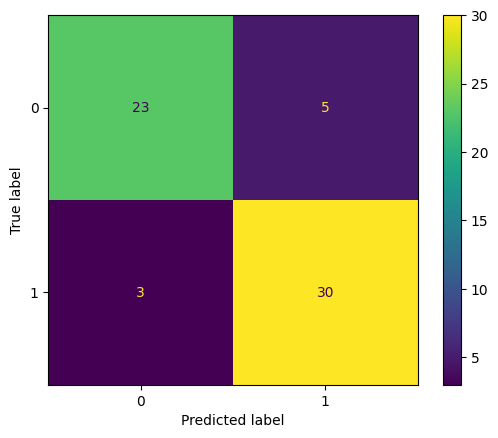

In [200]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

#### Decision Tree

In [201]:
# Create Decision Tree classifer object
tree_clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
tree_clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = tree_clf.predict(x_test)


In [202]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8360655737704918


In [203]:
metrics.confusion_matrix(y_test, y_pred)

array([[21,  7],
       [ 3, 30]])

### RandomForest Classifier

In [221]:
rf_model = RandomForestClassifier()

rf_model.fit(x_train, y_train)

y_pred = rf_model.predict(x_test)

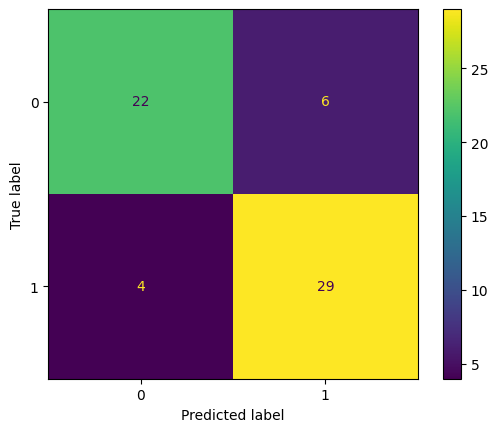

In [205]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [206]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8360655737704918


#### Hyperparameter Tuning for RandomForest Classifier

In [207]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fa25297eda0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fa252bd9c90>})

In [208]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 2, 'n_estimators': 467}


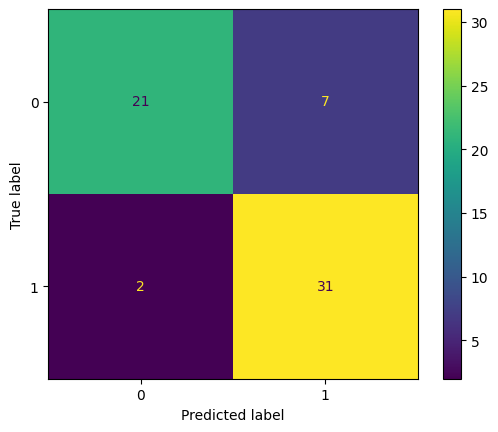

In [209]:
# Generate predictions with the best model
y_pred = best_rf.predict(x_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

### Xgboost Cross Validation

In [210]:
# Define the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 200],          # Number of boosting rounds
    'max_depth': [3, 4, 5],                # Maximum depth of each tree
    'learning_rate': [0.01, 0.1, 0.2],    # Step size shrinkage to prevent overfitting
    'subsample': [0.7, 0.8, 0.9],          # Fraction of samples used for fitting trees
    'colsample_bytree': [0.7, 0.8, 0.9],   # Fraction of features used for fitting trees
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)

# Fit the model to the data
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model for prediction
best_model_xgb = grid_search.best_estimator_
y_pred = best_model_xgb.predict(x_test)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.7}
Accuracy: 0.8524590163934426


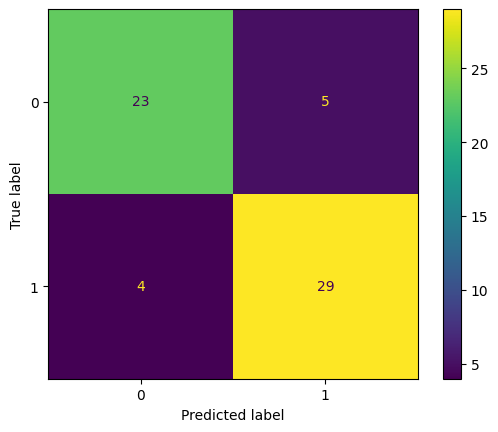

In [211]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [212]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84        28
           1       0.85      0.88      0.87        33

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



#### Plot xgboost model importances.

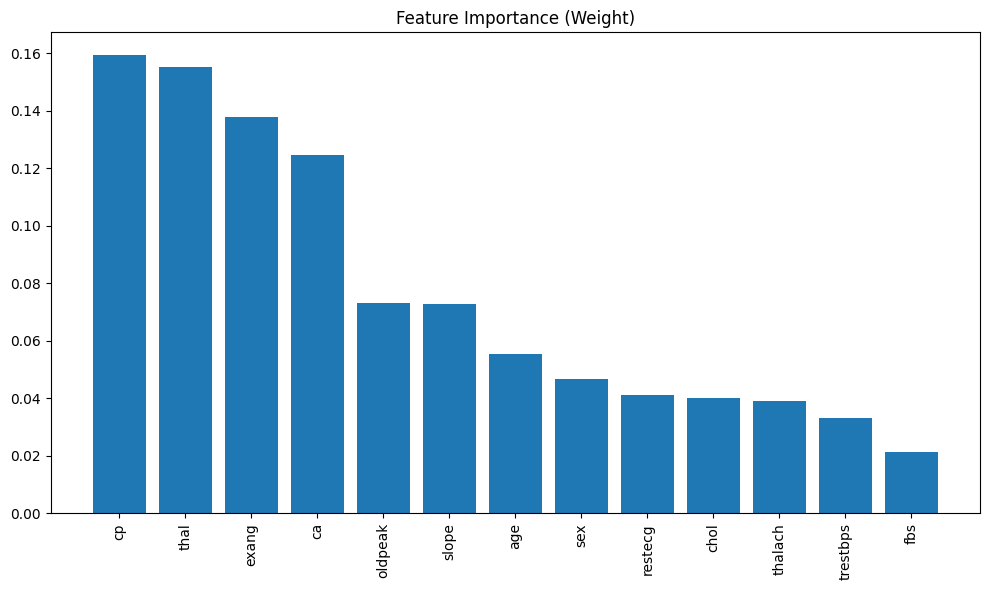

In [213]:
# Get feature importances
importances = best_model_xgb.feature_importances_

# Get feature names (assuming your data has column names)
feature_names = x_data.columns  # Replace 'your_data' with your actual dataset

# Sort feature importances and corresponding feature names in descending order
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances, tick_label=sorted_feature_names)
plt.title('Feature Importance (Weight)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Ensemble learning

> XGBoost can be combined with other machine learning algorithms to create ensembles, resulting in improved model performance and generalization

In [214]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
# Create instances of the classifiers
xgb_model = xgb.XGBClassifier(n_estimators=200, max_depth=3, learning_rate=0.1)
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
logistic_model = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)

# Create an ensemble using VotingClassifier
ensemble_model = VotingClassifier(estimators=[
    ('xgb', xgb_model),
    ('rf', rf_model),
    ('logistic', logistic_model)],
    voting='soft')

# Fit the ensemble model on the training data
ensemble_model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = ensemble_model.predict(x_test)

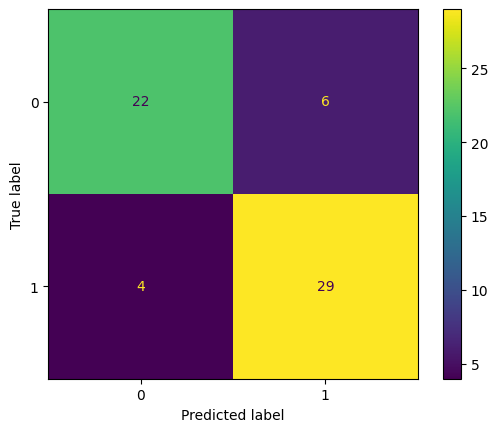

In [215]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [216]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.79      0.81        28
           1       0.83      0.88      0.85        33

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



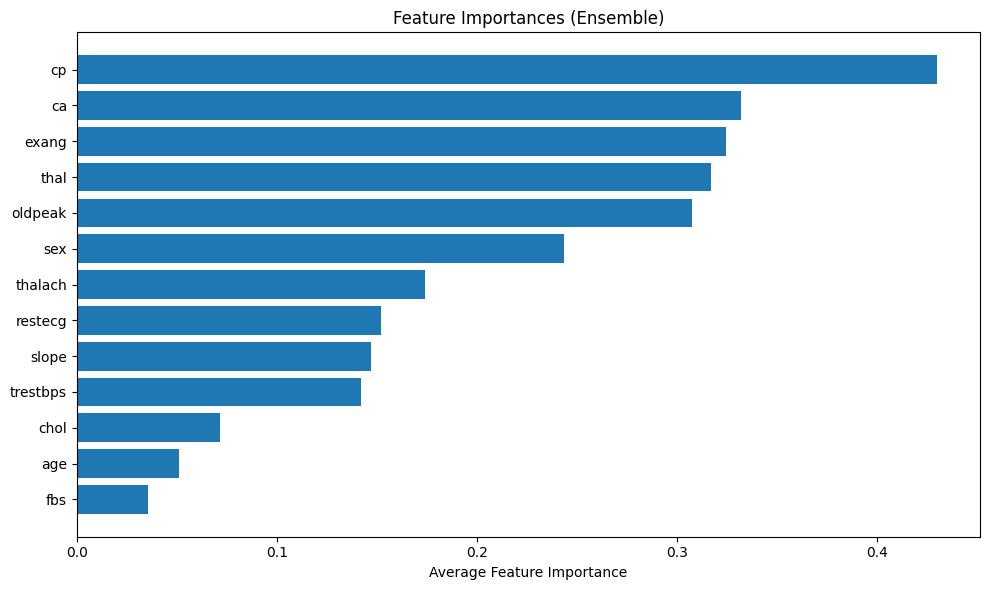

In [218]:
# Initialize lists to store feature importances from individual models
xgb_importances = best_model_xgb.feature_importances_
rf_importances = best_rf.feature_importances_
logistic_importances = log_reg_clf.coef_[0]

# Compute the average feature importances
average_importances = (xgb_importances + rf_importances + np.abs(logistic_importances)) / 3  # You can adjust weights if needed

# Get feature names (assuming your data has column names)
feature_names = x_data.columns  # Replace 'your_data' with your actual dataset

# Sort feature importances in descending order
sorted_indices = average_importances.argsort()[::-1]
sorted_importances = average_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_importances)
plt.xlabel('Average Feature Importance')
plt.title('Feature Importances (Ensemble)')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important feature at the top
plt.tight_layout()
plt.show()

### Model Perfomance Comparison

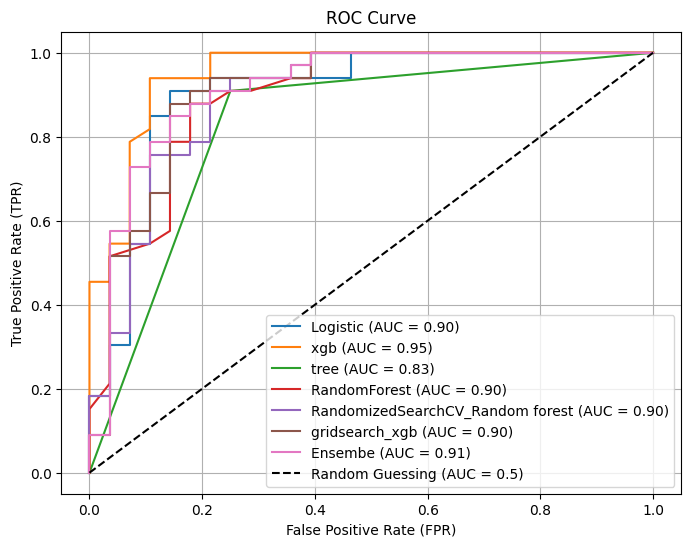

Logistic ROC-AUC: 0.90
xgb ROC-AUC: 0.95
tree ROC-AUC: 0.83
RandomForest ROC-AUC: 0.90
RandomizedSearchCV_Random forest ROC-AUC: 0.90
gridsearch_xgb ROC-AUC: 0.90
Ensembe ROC-AUC: 0.91


In [223]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# Define a list of models you want to compare
models = [log_reg_clf, xgb_clf, tree_clf, rf_model, best_rf, best_model_xgb, ensemble_model]  # Replace with your model instances

# Define labels for each model (for legend)
model_labels = ["Logistic", "xgb", "tree", 'RandomForest', 'RandomizedSearchCV_Random forest', 'gridsearch_xgb', 'Ensembe']  # Replace with labels

# Initialize an empty list to store ROC-AUC scores
roc_auc_scores = []

# Create a figure and axis for the ROC-AUC plot
plt.figure(figsize=(8, 6))

# Iterate through each model
for model in models:
    # Assuming you have test data X_test and true labels y_test
    y_pred_proba = model.predict_proba(x_test)[:, 1]  # Get probability of positive class
    roc_auc = roc_auc_score(y_test, y_pred_proba)  # Calculate ROC-AUC score
    roc_auc_scores.append(roc_auc)  # Store the ROC-AUC score

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    
    # Plot ROC curve for each model
    plt.plot(fpr, tpr, label=f"{model_labels[models.index(model)]} (AUC = {roc_auc:.2f})")

# Plot ROC curve for random guessing (baseline)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing (AUC = 0.5)')

# Customize the plot
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Display ROC-AUC scores for each model
for i, model_label in enumerate(model_labels):
    print(f"{model_label} ROC-AUC: {roc_auc_scores[i]:.2f}")


Based on these scores, the XGBoost model has the highest ROC-AUC score of 0.95, making it the top-performing model among the ones you've evaluated for binary classification. It's important to note that ROC-AUC is just one metric, and the choice of the best model may depend on other factors and project requirements. However, in terms of ROC-AUC performance, XGBoost stands out as the top performer.

### Saving the best model for streamlit web app

In [224]:
# Save the model # default xgb
model_filename = 'model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(xgb_cl, file)
print('Model Saved Succesfully!')

Model Saved Succesfully!
